In [4]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pl.read_parquet("data.parquet")
data

Step,Light_ID,Time,Lane,Num_Cars,Centrality,Is_Entrypoint,Intersection_u,Distance,Sim_ID
i32,i16,i16,str,i16,f32,bool,str,i16,i32
1,1,199,"""intersection_6""",0,0.024816,true,"""intersection_0""",13,0
1,1,199,"""intersection_46""",0,0.024816,true,"""intersection_0""",9,0
1,1,199,"""intersection_16""",0,0.024816,true,"""intersection_0""",11,0
1,1,199,"""intersection_24""",0,0.024816,true,"""intersection_0""",12,0
2,1,198,"""intersection_6""",0,0.024816,true,"""intersection_0""",13,0
…,…,…,…,…,…,…,…,…,…
999,84,1,"""intersection_61""",2,0.033812,true,"""intersection_83""",5,19
1000,84,200,"""intersection_1""",0,0.033812,true,"""intersection_83""",5,19
1000,84,200,"""intersection_23""",0,0.033812,true,"""intersection_83""",12,19


- Time, Centrality, Is_Entrypoint, and Distance will be used as features
- The model will aim to predict the number of cars at a lane at a time
- Step, Light_ID, Lane, Intersection_u, and Sim_ID will not be used

## Num Cars

In [3]:
data["Num_Cars"].describe()

statistic,value
str,f64
"""count""",6.61e6
"""null_count""",0.0
"""mean""",0.808964
"""std""",1.568006
"""min""",0.0
"""25%""",0.0
"""50%""",0.0
"""75%""",1.0
"""max""",35.0


In [6]:
print(
    f"{data.filter(pl.col('Num_Cars') > 1).__len__()} data points have more than one car at a light. This represents ~ {data.filter(pl.col('Num_Cars') > 1).__len__() / data.__len__() * 100}% of the data."
)

1250301 data points have more than one car at a light. This represents ~ 18.915295007564296% of the data.


## Time

In [13]:
data["Time"].describe()

statistic,value
str,f64
"""count""",6.61e6
"""null_count""",0.0
"""mean""",100.5
"""std""",57.73431
"""min""",1.0
"""25%""",51.0
"""50%""",101.0
"""75%""",150.0
"""max""",200.0


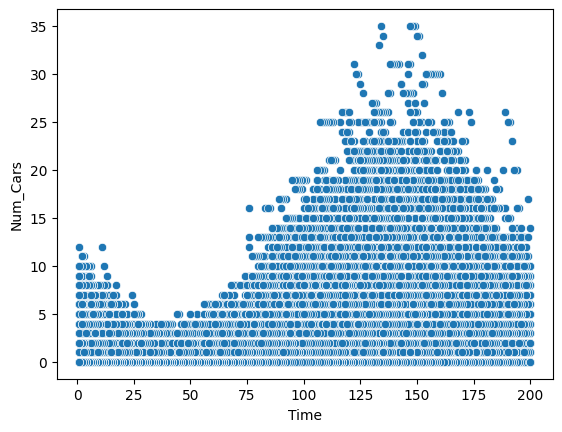

In [14]:
fig = sns.scatterplot(data=data, x="Time", y="Num_Cars")
plt.show()

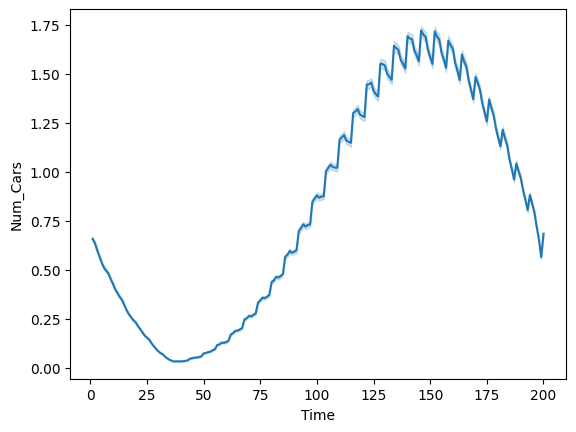

In [18]:
fig = sns.lineplot(data=data, x="Time", y="Num_Cars")
plt.show()

## Steps

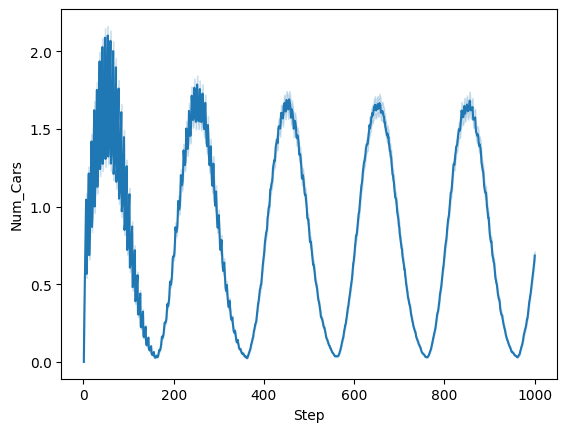

In [17]:
fig = sns.lineplot(data=data, x="Step", y="Num_Cars")
plt.show()

## Centrality

In [10]:
data["Centrality"].describe()

statistic,value
str,f64
"""count""",6.61e6
"""null_count""",0.0
"""mean""",0.024483
"""std""",0.007817
"""min""",0.01144
"""25%""",0.018251
"""50%""",0.02238
"""75%""",0.030176
"""max""",0.049383


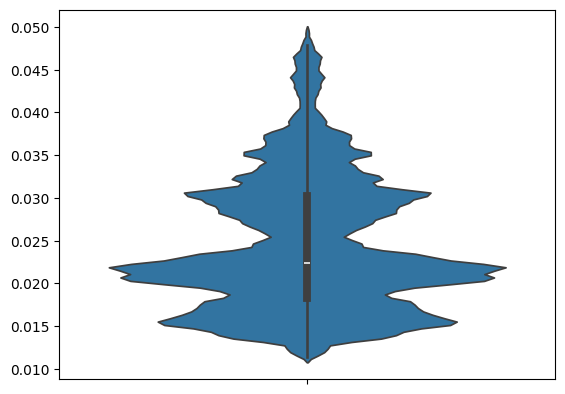

In [11]:
fig = sns.violinplot(data=data["Centrality"])
plt.show()

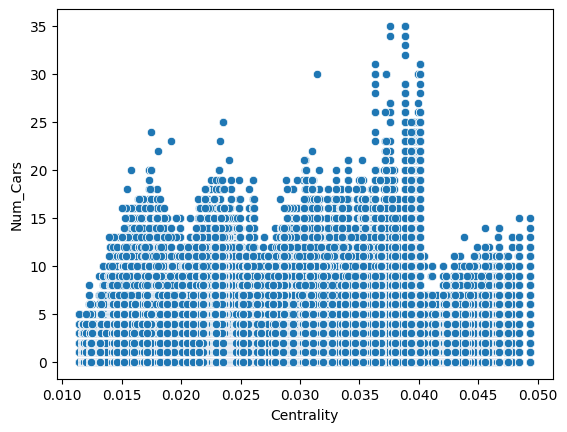

In [12]:
fig = sns.scatterplot(data=data, x="Centrality", y="Num_Cars")
plt.show()

## Is Entrypoint

In [19]:
data["Is_Entrypoint"].value_counts()

Is_Entrypoint,count
bool,u32
true,6608000
false,2000


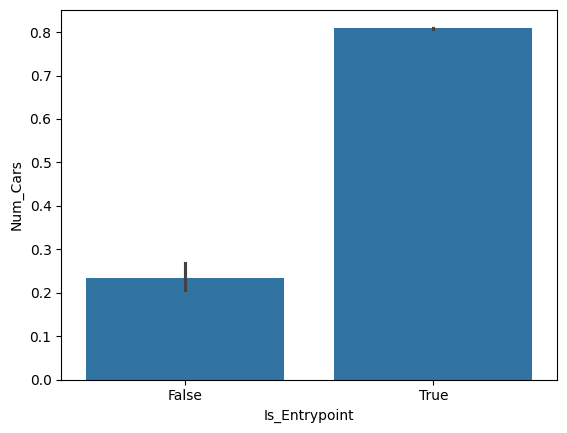

In [21]:
fig = sns.barplot(data=data.to_pandas(), x="Is_Entrypoint", y="Num_Cars")
plt.show()

## Distance

In [22]:
data["Distance"].describe()

statistic,value
str,f64
"""count""",6.61e6
"""null_count""",0.0
"""mean""",12.70348
"""std""",6.525487
"""min""",5.0
"""25%""",8.0
"""50%""",11.0
"""75%""",15.0
"""max""",39.0


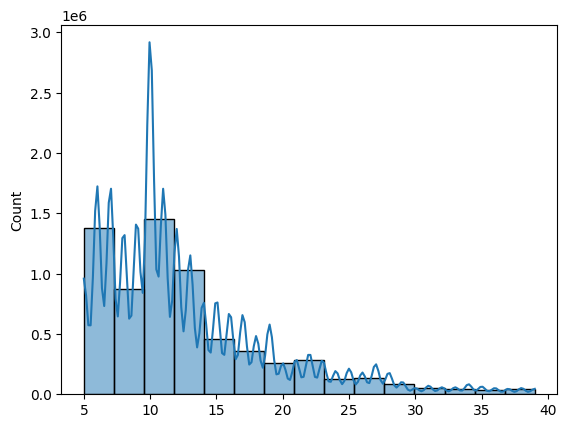

In [23]:
fig = sns.histplot(data=data["Distance"], bins=15, kde=True)
plt.show()

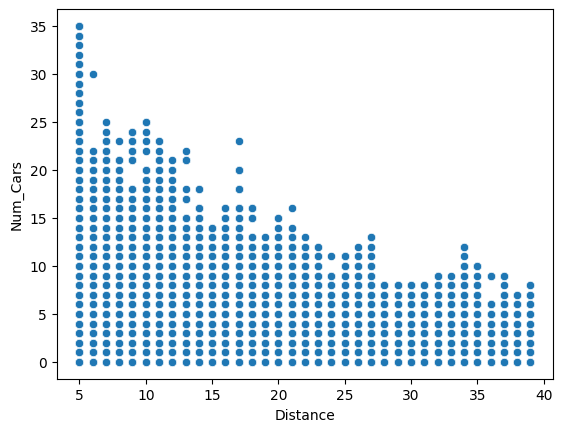

In [24]:
fig = sns.scatterplot(data=data, x="Distance", y="Num_Cars")
plt.show()